> 
# Project 2: Investigating No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

        I, Angie Koepcke,  chose to investigate the Bolsa Familia data set containing medical appointment data for 
    families enrolled in Brazil's welfare program. I chose this data set because at one time I wanted to become a 
    social worker. 

        The idea of studying how medical conditions may affect a patient's ability to show up for scheduled appointments 
    is interesting to me because one of the criticisms of the program is that young men returning home from
    correctional facilities will use the program money to buy alcohol(https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). 
    Data supporting this criticism this might indicate the need for program alternatives for some participants, such as 
    in-home appointments which include treatment for substance abuse. But is alcoholism amoung young men even an issue
    contributing to no-show appointments?
    
        Are some medical conditions preventing patients from showing up for their appointments, or is it another 
    variable? Do age, day of week, or time of day impact the likelihood of an appointment no-show, or is it a specific
    combination of factors? This report will visualize my findings, and may show a possible relationship between variables
    which could be used to further test for a specific course of action to improve the Bolsa Familia program for future
    participants.
>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Here we are loading the Bolsa Familia medical appointment data to see what it looks like.
#  It appears the 'PatientId' column is showing in scientific notation. Also, the column names could be improved.
import os
cwd = os.getcwd()
print(cwd)
os.listdir(cwd)

no_shows=pd.read_csv('noshow_appointments.csv');
no_shows.head()

c:\Users\Justine\Desktop\Coding\Udacity\Udacity Project 2


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Cleaning

The 'PatientId' column initially came in to the Jupyter Notebook in float format and was reading as Scientific Notation. The column was changed to a string to get rid of the scientific notation for easier viewing. Duplicate data was not found in this dataset, although some participants had multiple appointments. The date columns were edited and new columns were created so I could examine data for specific days or months in graphs.


### Data Cleaning 



In [3]:
# I am changing the 'PatientId' column type to improve the visual format.
#   The code below changes the column type. The head() will show us the change.
no_shows.PatientId=no_shows.PatientId.astype(str)
no_shows.ScheduledDay=no_shows.ScheduledDay.astype(str)
no_shows.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
# The date/time columns need to be changed to a more useful format.
no_shows.AppointmentDay.str.slice(0,-10).head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

In [5]:
# The code below will give us a date for 'AppointmentDay' using the to_datetime function.
# Creating a weekday column will allow us to use this data more effectively in groups and visuals

no_shows['ScheduledDay']=pd.to_datetime(no_shows.ScheduledDay)
no_shows['AppointmentDay']=pd.to_datetime(no_shows.AppointmentDay)
no_shows['Scheduled_Time']=no_shows.ScheduledDay.dt.hour
no_shows['Appt_Weekday']=no_shows.AppointmentDay.dt.weekday_name
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Time,Appt_Weekday
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday


In [6]:
# I added a column which separated the month from the date. I was curious if the month and no-shows might show correlation.
no_shows['Appt_Month']=no_shows.AppointmentDay.dt.month_name()
no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Time,Appt_Weekday,Appt_Month
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,April
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,April
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,April
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,April
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,April


In [7]:
# The column names needed to be changed.
## Here I could have also used the code labels = [], and then read_csv('', header=0, names=labels). 

no_shows=no_shows.rename(columns={'PatientId':'Patient ID'})
no_shows=no_shows.rename(columns={'AppointmentID':'Appointment ID'})
no_shows=no_shows.rename(columns={'ScheduledDay':'Scheduled Day'})
no_shows=no_shows.rename(columns={'AppointmentDay':'Appointment Day'})
no_shows=no_shows.rename(columns={'Scheduled_Time':'Scheduled Time'})
no_shows=no_shows.rename(columns={'Appt_Weekday':'Appointment Weekday'})
no_shows=no_shows.rename(columns={'Appt_Month':'Appointment Month'})
no_shows.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,April
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,April
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,April
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,April
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,April


In [8]:
# I am creating a data set with only those patients who did not show-up for their appointment.
no_shows_yes=no_shows[no_shows['No-show']=='Yes']
no_shows_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April
11,7542951368435.0,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,8,Friday,April
17,14794966191172.0,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,9,Friday,April
20,622257462899397.0,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,7,Friday,April


In [9]:
# This code grouped the data by appointments on Friday with the index as the age
Appt_Wd=no_shows_yes.groupby(['Appointment Weekday'])
Appt_Wd.get_group("Friday").set_index("Age").head()



,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
Age,,,,,,,,,,,,,,,,
23,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April
39,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April
29,7542951368435.0,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,NOVA PALESTINA,0,0,0,0,0,1,Yes,8,Friday,April
40,14794966191172.0,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,CONQUISTA,1,0,0,0,0,0,Yes,9,Friday,April
30,622257462899397.0,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,NOVA PALESTINA,0,0,0,0,0,0,Yes,7,Friday,April


In [10]:
# The largest group of no-shows were nine year-olds on Wednesdays
Appt_Wd['Age'].value_counts().sort_index().nlargest()

Appointment Weekday  Age
Monday               0      175
Wednesday            0      145
Tuesday              0      128
Wednesday            9      109
Monday               1      101
Name: Age, dtype: int64

In [11]:
# This code is to view the number of no-show appointments by weekday
no_shows_yes['Appointment Weekday'].value_counts().sort_index()

Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: Appointment Weekday, dtype: int64

In [12]:
# We can remove thw age outliers from the data, although, I considered an age of -1 to refer to babies under the age of 1. 
## Lets see how many babies there are.
babies_ns=no_shows.query('Age <= 0')
babies_ns['No-show'].value_counts().sort_index()

No     2901
Yes     639
Name: No-show, dtype: int64

In [13]:
#Let's see how many no-show babies have the medical condition hipertension
babies_ns=no_shows.query('Age <=0')
babies_ns['Hipertension'].value_counts().sort_index()

0    3540
Name: Hipertension, dtype: int64

In [14]:
#Let's see how many no-show babies have the medical condition Alcoholism
babies_ns['Alcoholism'].value_counts().sort_index()

0    3540
Name: Alcoholism, dtype: int64

In [15]:
babies_ns['Diabetes'].value_counts().sort_index()

0    3540
Name: Diabetes, dtype: int64

In [16]:
babies_ns['Handcap'].value_counts().sort_index()

0    3539
1       1
Name: Handcap, dtype: int64

In [17]:
# Hey... are these really babies? Babies don't go to school!
babies_ns['Scholarship'].value_counts().sort_index()

0    3488
1      52
Name: Scholarship, dtype: int64

In [18]:
#I am going to remove the ages less than zero and greater than 100 to get the most relevant data
rz_no_shows_yes=no_shows_yes[no_shows_yes['Age']>0]
rz_no_shows_yes['Age'].value_counts().sort_index().nlargest()

1     415
17    396
19    394
30    369
9     364
Name: Age, dtype: int64

In [19]:
# Here I am removing the ages greater than 100
no_shows_yes=rz_no_shows_yes[rz_no_shows_yes['Age']<=100]
no_shows_yes['Age'].value_counts().sort_index().nlargest()

1     415
17    396
19    394
30    369
9     364
Name: Age, dtype: int64

In [20]:
no_shows_yes.describe().Age

count    21677.000000
mean        35.318125
std         21.451648
min          1.000000
25%         18.000000
50%         33.000000
75%         52.000000
max         98.000000
Name: Age, dtype: float64

In [21]:
# I am going to remove the ages less than zero and greater than 100 in the original data set
rz_no_shows=no_shows[no_shows['Age']>0]
rz_no_shows['Age'].value_counts().sort_index().nlargest()

1     2273
52    1746
49    1652
53    1651
56    1635
Name: Age, dtype: int64

In [22]:
# Here I am removing ages over 100 and checking to make sure the max age is less than 100
no_shows=rz_no_shows[rz_no_shows['Age']<100]
no_shows.describe().Age

count    106976.000000
mean         38.309004
std          22.456395
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Which age group has the most cancellations?


In [23]:
### How many appointments were no-shows compared to completed appointments?
no_shows['No-show'].value_counts().sort_index()

No     85299
Yes    21677
Name: No-show, dtype: int64

In [24]:
# I will create a variable for those below the mean age, and those over the mean age for no-show appointments.
## This code will get the mean age.
no_shows_yes.Age.mean()


35.318125201826824

In [25]:
#I will create a variable for younger patients who are no-shows
younger_ns=no_shows_yes.query('Age < 35.31')

## I will create a variable for older patients who are no-shows
older_ns=no_shows_yes.query('Age >= 35.31')

In [26]:
# I am checking the data head for the younger_ns data set
younger_ns.head(1)

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April


In [27]:
# Here I am checking the number of no-show appointments for the younger patients
younger_ns['No-show'].value_counts().sort_index()

Yes    11461
Name: No-show, dtype: int64

In [28]:
# This code is to check the data head for the older_ns data set
older_ns.head(1)

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,15,Friday,April


In [29]:
# We can see there are less no-show appointments in the older age group
older_ns['No-show'].value_counts().sort_index()

Yes    10216
Name: No-show, dtype: int64

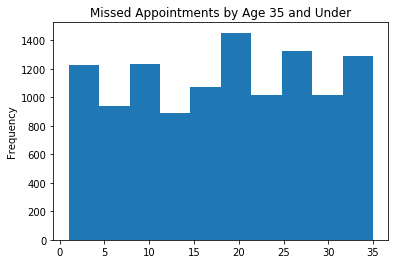

In [30]:
# This histogram shows the highest amount of missed appointments by age
younger_ns['Age'].plot(kind='hist', title='Missed Appointments by Age 35 and Under');

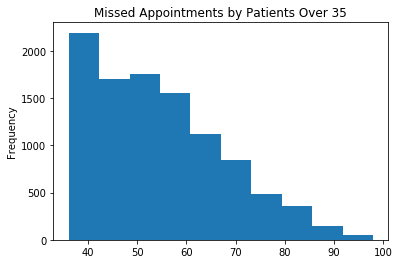

In [31]:
# This histogram shows most missed appointments are among people in their late 30's and early 40's.
## The graph is right-skewed.
older_ns['Age'].plot(kind='hist', title='Missed Appointments by Patients Over 35');

In [32]:
# I want to see the highest frequency of no-shows by age
no_shows_yes['Age'].value_counts().sort_index().nlargest(10)

1     415
17    396
19    394
30    369
9     364
20    355
21    355
16    353
25    352
22    351
Name: Age, dtype: int64

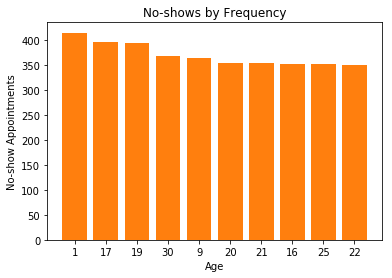

In [33]:
plt.bar([1,2,3,4,5,6,7,8,9,10],[415,396,394,369,364,355,355,353,352,351])
plt.xticks([1,2,3,4,5,6,7,8,9,10],[1,17,19,30,9,20,21,16,25,22])
plt.bar([1,2,3,4,5,6,7,8,9,10],[415,396,394,369,364,355,355,353,352,351], tick_label=[1,17,19,30,9,20,21,16,25,22])
plt.title('No-shows by Frequency')
plt.xlabel('Age')
plt.ylabel('No-show Appointments');

In [34]:
# Let's use code to get a comparison of no-shows for those 17 to 25 and under versus all other patients.
under_26=no_shows_yes[no_shows_yes['Age'] < 26]
under_26.describe()

,Appointment ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduled Time
count,8.179000e+03,8179.000000,8179.000000,8179.000000,8179.000000,8179.000000,8179.000000,8179.000000,8179.000000
mean,5.653615e+06,13.369727,0.130823,0.004157,0.003546,0.004768,0.013327,0.442475,11.154175
std,7.033098e+04,7.256877,0.337227,0.064344,0.059443,0.068892,0.131561,0.496710,3.113304
min,5.209081e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,5.612239e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,5.657439e+06,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,5.702566e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,5.788852e+06,25.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,20.000000


In [35]:
under_26['No-show'].value_counts().sort_index()

Yes    8179
Name: No-show, dtype: int64

In [36]:
len(under_26)

8179

In [37]:
under_17=no_shows_yes[no_shows_yes['Age']<17]
under_17.describe()

,Appointment ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduled Time
count,4.962000e+03,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,5.651940e+06,8.497179,0.135228,0.001814,0.002418,0.002217,0.015115,0.416364,11.011487
std,7.207853e+04,4.698927,0.342001,0.042554,0.049122,0.047036,0.146081,0.493005,3.058205
min,5.227376e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,5.607374e+06,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,5.655997e+06,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,5.701352e+06,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,5.788852e+06,16.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,20.000000


In [38]:
len(under_17)

4962

In [39]:
age_17_to_25=int(len(under_26))-int(len(under_17))
print(age_17_to_25)

3217


In [40]:
over_25=no_shows_yes[no_shows_yes['Age']>25]
len(over_25)

13498

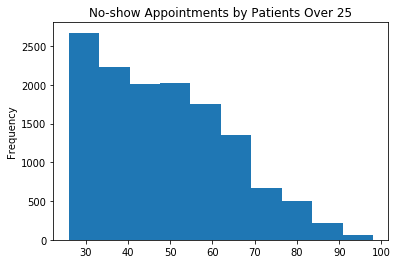

In [41]:
# The histogram below is right-skewed and shows a general decrease in missed appoints after age 25
over_25['Age'].plot(kind='hist', title='No-show Appointments by Patients Over 25');

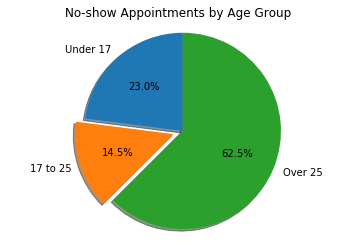

In [42]:
# Let's use code to get a pie chart comparison of no-shows for patients under 17, patients 17 to 25, and all other patients.

labels= 'Under 17','17 to 25','Over 25'
sizes = [4962, 3127, 13498]
explode=(0,0.1,0)

fig1, ax1=plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis('equal')




ax1.set_title("No-show Appointments by Age Group")

plt.show()

#### Research Question 1 Conclusion

    The research question was, what age group has the most missed appointments? There are a total of 106,976 
    patient appointments in this data set, and approximately 20% were no-shows. The total amount of no-shows was 21,677.
    Age group 17 to 25 proportionally only represents 8 different ages, yet has 14.5% of the no-show appointments. This 
    is significant and should be explored further.

### Research Question 2 - Let's explore patient variables across the group of no-shows versus the group of successful appointments. Which variables show the most correlation to no-show appointments?

In [43]:
# Let's group the handicapped patients, including all patients in the database
hc_yes=no_shows[no_shows['Handcap']==1]
hc_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
147,298485421329347.0,5639200,F,2016-04-29 08:48:03+00:00,2016-04-29 00:00:00+00:00,65,UNIVERSITÁRIO,0,1,0,0,1,0,No,8,Friday,April
189,665252547682748.0,5640552,F,2016-04-29 10:56:26+00:00,2016-04-29 00:00:00+00:00,77,CONQUISTA,0,1,0,0,1,0,No,10,Friday,April
190,9458117812.0,5640554,M,2016-04-29 10:56:40+00:00,2016-04-29 00:00:00+00:00,81,CONQUISTA,0,0,0,0,1,0,No,10,Friday,April
199,64317474249528.0,5639969,M,2016-04-29 09:54:38+00:00,2016-04-29 00:00:00+00:00,62,PARQUE MOSCOSO,0,1,1,0,1,0,No,9,Friday,April
211,9873741877597.0,5631146,F,2016-04-27 18:03:02+00:00,2016-04-29 00:00:00+00:00,56,MARUÍPE,0,1,0,0,1,0,No,18,Friday,April


In [44]:
# Here is the count of the handicapped patients
hc_yes['No-show'].value_counts().sort_index()

No     1672
Yes     363
Name: No-show, dtype: int64

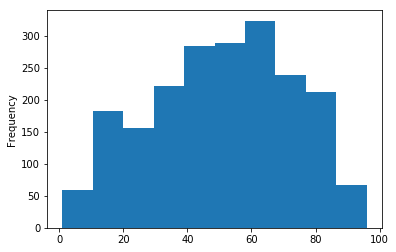

In [45]:
hc_yes['Age'].plot(kind='hist');

### The group of patients with the medical condition of handicap only accounted for 366 of 22,319 missed appointments.

In [46]:
#This code will group patients with the medical condition Alcoholism.
alc_yes=no_shows[no_shows['Alcoholism']==1]
alc_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
46,137943696338.0,5615608,M,2016-04-25 12:44:36+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No,12,Friday,April
131,47559375448498.0,5637150,M,2016-04-28 17:38:06+00:00,2016-04-29 00:00:00+00:00,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes,17,Friday,April
133,3587185996856.0,5580520,M,2016-04-14 07:07:10+00:00,2016-04-29 00:00:00+00:00,69,PRAIA DO SUÁ,0,0,1,1,0,0,No,7,Friday,April
186,73296611628432.0,5587737,M,2016-04-15 09:02:16+00:00,2016-04-29 00:00:00+00:00,66,REDENÇÃO,0,1,0,1,0,0,No,9,Friday,April
207,63597955332399.0,5642700,M,2016-04-29 16:49:22+00:00,2016-04-29 00:00:00+00:00,46,MARUÍPE,0,0,0,1,0,0,No,16,Friday,April


In [47]:
alc_yes['No-show'].value_counts().sort_index()

No     2683
Yes     677
Name: No-show, dtype: int64

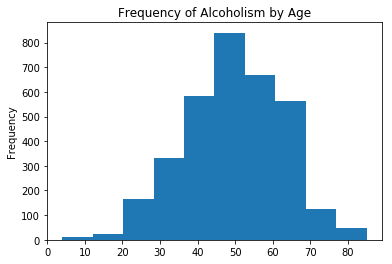

In [48]:
alc_yes['Age'].plot(kind='hist', title='Frequency of Alcoholism by Age');

In [49]:
# This code is divinding the number of no-show patients with alcoholism by the total number of no-show appointments
alc_ns_rate = 677 / int(len(no_shows_yes))
print(alc_ns_rate)

0.03123125893804493


### Patients with the medical condition alcoholism accounted for only 677 out of 21,677 no-show appointments. Although this is more than patients with the condition handicap, it is still roughly only 3% of the total amount of missed appointments.

In [50]:
#This code will group patients with the medical condition Hipertension.
hip_yes=no_shows[no_shows['Hipertension']==1]
hip_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,April
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,April
5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,8,Friday,April
25,5819369978796.0,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,No,15,Friday,April
26,25787851512.0,5641781,F,2016-04-29 14:19:42+00:00,2016-04-29 00:00:00+00:00,45,BENTO FERREIRA,0,1,0,0,0,0,No,14,Friday,April


In [51]:
hip_yes['No-show'].value_counts().sort_index()

No     18028
Yes     3772
Name: No-show, dtype: int64

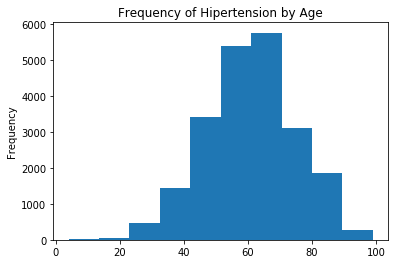

In [52]:
hip_yes['Age'].plot(kind='hist', title='Frequency of Hipertension by Age');

#### So far, patients with hipertension accounted for the most amount of missed appointments, at 3,772 of 21,677 no-shows. Approximately 17% of no-show patients have hypertension.

In [53]:
#This code will group patients with the medical condition Diabetes.
dbs_yes=no_shows[no_shows['Diabetes']==1]
dbs_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,April
36,72984587621439.0,5637975,F,2016-04-29 07:35:19+00:00,2016-04-29 00:00:00+00:00,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,7,Friday,April
37,1578131861739.0,5637986,F,2016-04-29 07:35:56+00:00,2016-04-29 00:00:00+00:00,64,TABUAZEIRO,1,1,1,0,0,0,No,7,Friday,April
41,822432466381793.0,5633339,F,2016-04-28 09:20:36+00:00,2016-04-29 00:00:00+00:00,71,MARUÍPE,0,0,1,0,0,0,No,9,Friday,April
44,274164858852.0,5635414,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,13,Friday,April


In [54]:
dbs_yes['No-show'].value_counts().sort_index()

No     6513
Yes    1430
Name: No-show, dtype: int64

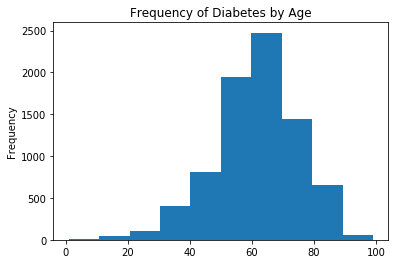

In [55]:
dbs_yes['Age'].plot(kind='hist', title = 'Frequency of Diabetes by Age');

#### Patients with the medical condition diabetes account for 1,430 of 21,677 missed appointments.This is approximately 7% of no-show appointments.

In [58]:
scholar_yes=no_shows[no_shows['Scholarship']==1]
scholar_yes.head()

,Patient ID,Appointment ID,Gender,Scheduled Day,Appointment Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled Time,Appointment Weekday,Appointment Month
12,566654781423437.0,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,1,0,0,0,0,0,No,11,Friday,April
17,14794966191172.0,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,9,Friday,April
18,17135378245248.0,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No,10,Friday,April
31,311284853849.0,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,12,Friday,April
33,7653516999712.0,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No,15,Friday,April


In [60]:
scholar_yes['No-show'].value_counts().sort_index()

No     8238
Yes    2571
Name: No-show, dtype: int64

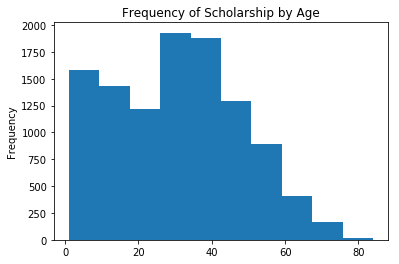

In [62]:
scholar_yes['Age'].plot(kind='hist', title = 'Frequency of Scholarship by Age');

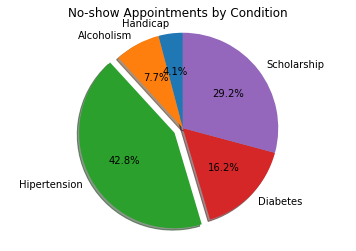

In [65]:
# Let's use code to get a pie chart comparison of conditionals for all no-show patients
labels= 'Handicap','Alcoholism','Hipertension','Diabetes','Scholarship'
sizes = [363, 677, 3772, 1430, 2571]
explode=(0, 0, 0.1, 0, 0)

fig1, ax1=plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis('equal')




ax1.set_title("No-show Appointments by Condition")

plt.show()

In [77]:
#The mean age for patients with hipertension is 59.72
no_shows_yes.groupby('Hipertension').mean().Age

Hipertension
0    30.177213
1    59.721103
Name: Age, dtype: float64

In [78]:
#The mean age for patients in scholarship is 29.54
no_shows_yes.groupby('Scholarship').mean().Age

Scholarship
0    36.094421
1    29.549203
Name: Age, dtype: float64

### Research Question 2 Conclusion - The data is showing the medical condition hipertension has the highest rate of no-show appointments compared to the conditions of alcoholism, diabetes, handicap or scholarship. 

## Limitations

#### Research Question 1 Limitations

One important limitaion of this data set in researching the age group with the most no-shows was that I didn't have clarification on how babies were classified in the age column, if at all. Did a negative number or zero mean the patient was a baby, or, was this an error in the data set? Because the data set is about patients in a social welfare program, I deducted it might be valid to explore the medical conditions of those in the age groups classed as a negative number or zero. The exploration found that those in the age group zero or negative didn't have hipertension or alcoholism. However, the "babies" also didn't have diabetes, and only one was classified as medical condition handicap. The query showed 52 with a negative age or age zero. This is unlikely. More infomation would be needed about the age column.

Another thing to consider is the fact that being a baby is in fact a condition in itself which could contribute to no-show appointments. Either way, the lack of clarification on ages zero or negative can be considered a limitation.

A data set always has the limitation of junk in, junk out. There is no way to determine how many clerical errors are in this data set. We have to assume there are errors based on the number of patients listed with a negative age, 52, yet also classified under Scholarship.

<a id='conclusions'></a>
## Conclusions

> The first research question asked which age group had the highest number of no-show appointments. There were 106,976 total appointments after removing the outliers of negative numbers and numbers over 100. Of the total appointments, 21,677 were no-shows. The average age for the group of no-show appoinments was 35.31. The younger age group, those under 35, had the most amount of no-show appointments with a total of 11,461. The group of patients age 35 and older had 10,261 no-show appointments. The data showed a decline in no-show appointments as age increased, starting at age 35.

> A frequency count was run against all age groups to get the top ten no-show appointments by age. The data shows the age group between 17 and 25 has a higher no-show rate compared to other age groups.The total amount of no-shows in the top ten age groups was 3,704, and ages 16 through 25 accounted for 2,556 of those. Ages 16 through 25 accounted for approximately 69% of no-shows in the top ten group.

>The second research question compares the conditional variables and the number of no-show appointments associated with those variables against the total number of no-show appointments. The greatest number of no-show appointments were associated with hipertension.

